In [28]:
import feather
import matplotlib.pyplot as plt
import numpy as np
import cmocean

def plot_depth_slice(df,d,ax):
    x = df['x'].unique()
    y = df['y'].unique()
    z = df['z'].unique()[d]
    xx,yy =np.meshgrid(x,y)
    zeta = np.array(df.loc[df['z']==z]['disp'])
    zeta = np.reshape(zeta,(len(x),len(y)))
    p = ax.contourf(xx/1000,yy/1000,zeta,20,cmap=cmocean.cm.thermal)
    ax.set_xlabel("Latitude (km)")
    ax.set_ylabel("Longitude (km)")
    return(p)
    
def plot_lon_slice(df,d,ax):
    x = df['x'].unique()
    z = df['z'].unique()
    y = df['y'].unique()[d]
    xx,zz =np.meshgrid(x,z)
    zeta = np.array(df.loc[df['y']==y]['disp'])
    zeta = np.reshape(zeta,(len(x),len(z)))
    ax.invert_yaxis()
    p = ax.contourf(xx/1000,zz/1000,zeta,20,cmap=cmocean.cm.thermal)
    ax.set_xlabel("Latitude (km)")
    ax.set_ylabel("Depth (km)")
    return p

def plot_lat_slice(df,d,ax):
    y = df['y'].unique()
    z = df['z'].unique()
    x = df['x'].unique()[d]
    yy,zz =np.meshgrid(y,z)
    zeta = np.array(df.loc[df['x']==x]['disp'])
    zeta = np.reshape(zeta,(len(y),len(z)))
    ax.invert_yaxis()
    p = ax.contourf(yy/1000,zz/1000,zeta,20,cmap=cmocean.cm.thermal)
    ax.set_xlabel("Longitude (km)")
    ax.set_ylabel("Depth (km)")
    return p

In [27]:
%run ../scripts/run_sim_v2.py

Simulating:   0%|          | 0/21 [00:00<?, ?it/s]

Intializing wavefield
[10.+10.j 10.+10.j 10.+10.j 10.+10.j 10.+10.j 10.+10.j]
[0.17453293 0.34906585 0.52359878 0.6981317  0.87266463 1.04719755]
INPUT PARAMETERS:
	Frequencies :  [2.77777778e-05 5.55555556e-05 8.33333333e-05]
	Amplitudes  [10.+10.j 10.+10.j 10.+10.j 10.+10.j 10.+10.j 10.+10.j]
	Headings  [0.17453293 0.34906585 0.52359878 0.6981317  0.87266463 1.04719755]
	Horizontal Waves : [array([2.62070539e-06+0.j, 5.24152823e-06+0.j, 7.86258599e-06+0.j]), array([5.95947463e-06+0.j, 1.19193680e-05+0.j, 1.78800990e-05+0.j])]
Datafile directory:  ../data/3d


Writing to Disk: 100%|##########| 21/21 [00:00<00:00, 31.34it/s]


<IPython.core.display.Javascript object>


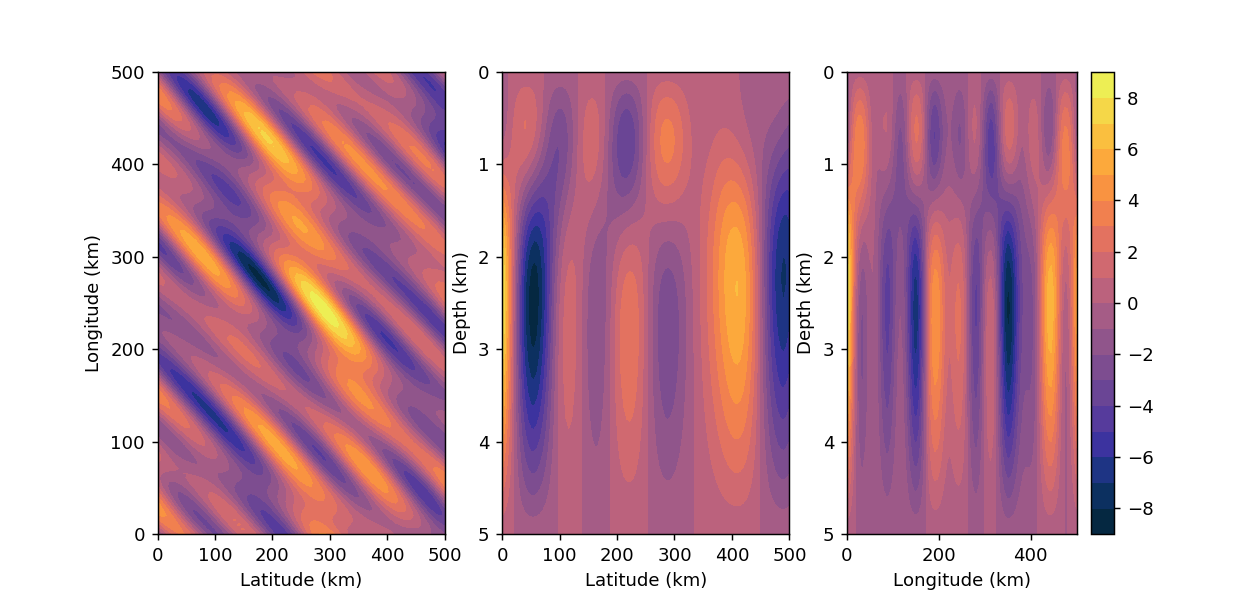

In [31]:
%matplotlib notebook
df = feather.read_dataframe('../data/3d/run-10.fthr')

f , (ax1,ax2,ax3) = plt.subplots(1,3)
p1 = plot_depth_slice(df,0,ax1)
p2  = plot_lon_slice(df,0,ax2)
p3  = plot_lat_slice(df,0,ax3)
f.colorbar(p2)